In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u_z_inf(x, y, b):
    theta1 = np.arctan2(y,x-0.5)
    theta2 = np.arctan2(y,x-(-0.5))
    frac = (theta1-theta2)/(2*np.pi)
    return b*frac
  

def u_z_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_z_inf(x_update,y_update,1)
    return image_sum


def u_z_error(x,y): 
    s_x = u_z_image(1,-0.5,10)-u_z_image(-1,-0.5,10)
    s_y = u_z_image(-1,0.5,10)-u_z_image(-1,-0.5,10)
    s = np.array([s_x, s_y])
    c_vec = np.array([(x/2)*2, y])
    err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    return err


def u_z_total(x,y):
 return u_z_image(x, y, 10) - u_z_error(x,y)
    

u_z_error(0,-0.5)

-0.17612159975297625

In [3]:
x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z = u_z_total(X, Y)

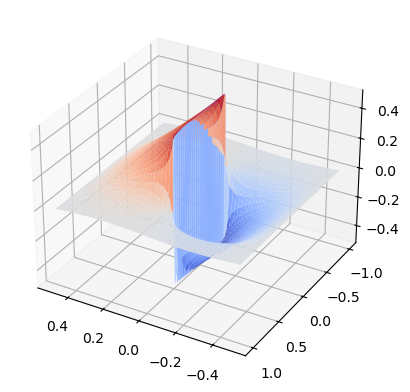

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)

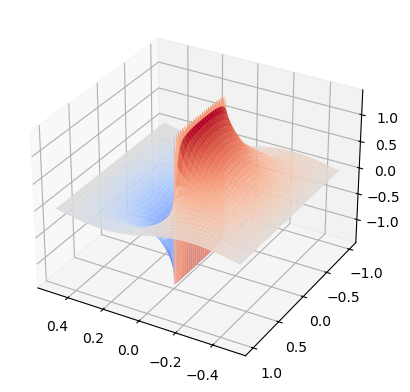

In [46]:
#### Edge dislocation displacements

def u_x (x,loc1, loc2, y, b, v):
    factor1 = b/(2*np.pi)
    theta1 = np.arctan2(y,x-loc1)
    term1 = ((x-loc1)*y)/(2*(1-v)*((x-loc1)**2+y**2))
    factor2 = -b/(2*np.pi)
    theta2 = np.arctan2(y,x-loc2)
    term2 = ((x-loc2)*y)/(2*(1-v)*((x-loc2)**2+y**2))
    return (factor1*(theta1 + term1))+(factor2*(theta2 + term2))

def u_x_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_x(x_update,-0.5, 0.5,y_update,2.8, 0.25)
    return image_sum

def u_x_error(x,y): 
    #s_x = u_x_image(1,-0.5,10)-u_x_image(-1,-0.5,10)
    s_y = u_x_image(1,-0.5,10)-u_x_image(1,0.5,10)
    #s = np.array([s_x, s_y])
    #c_vec = np.array([(x/2)*2, y])
    #err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    err = s_y*y
    return err

x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z =   u_x_image(X, Y, 10)+u_x_error(X,Y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)




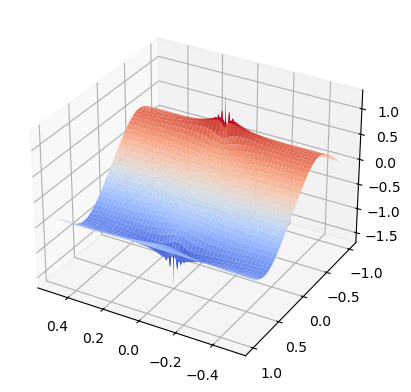

In [50]:
def u_y (x, loc1, loc2, y, b, v):
    factor1 = -b/(2*np.pi)
    term11 = ((1-2*v)/(4*(1-v)))*np.log((x-loc1)**2+y**2)
    term12 = ((x-loc1)**2-y**2)/(4*(1-v)*((x-loc1)**2+y**2))
    factor2 = b/(2*np.pi)
    term21 = ((1-2*v)/(4*(1-v)))*np.log((x-loc2)**2+y**2)
    term22 = ((x-loc2)**2-y**2)/(4*(1-v)*((x-loc2)**2+y**2))
    return (factor1*(term11+term12))+(factor2*(term21+term22))

def u_y_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_y(x_update,-0.5, 0.5,y_update,2.8, 0.24)
    return image_sum

def u_y_error(x,y): 
    s_x = u_y_image(-1,0.5,10)-u_y_image(1,0.5,10)
    #s_y = u_y_image(-1,-0.5,10)-u_y_image(-1,0.5,10)
    #s = np.array([s_x, s_y])
    #c_vec = np.array([(x/2)*2, y])
    #err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    err = s_x*x
    return err


x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z =   u_y_image(X, Y, 10)-0.17#+(u_y_error(X,Y)/2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)

In [94]:
u_x_image(1,-0.5,10)#+0.74*(0.5)

0.3742723972697198

In [8]:
def test_x(x,y,nu,b_e):
     disp_m = b_e / (2 * np.pi) * (np.arctan2(y,x) + (x * y) / (2 * (1 - nu) * (x**2 + y**2)))
     return disp_m


test_x(-0.5,1,0.24,2.8)

0.7893450013797364

In [6]:
def test_x2(x, y, b, v):
    factor1 = b/(2*np.pi)
    theta1 = np.arctan2(y,x)
    term1 = ((x)*y)/(2*(1-v)*((x)**2+y**2))

    return (factor1*(theta1 + term1))

test_x2(-0.5,1,2.8,0.24)

0.7893450013797364